# Randomized Search No. 1

In [1]:
# Import the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data.
data = pd.read_csv('heart.csv')

In [3]:
# Read the first lines of the data.
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Now let's perform some EDAs (Exploratory Data Analysis).
# Show information about the targets.
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
# Calculate the mean of targets grouped by sex.
# We can use this command instead:
# data.groupby('sex')['target'].mean()
data.groupby('sex').target.mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

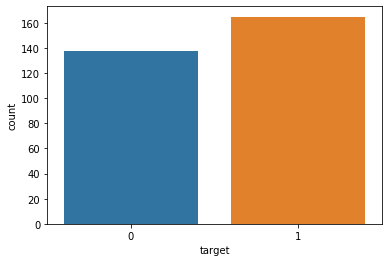

In [6]:
# Use seaborn library to plot the count of targets.
sns.countplot(data=data, x='target')

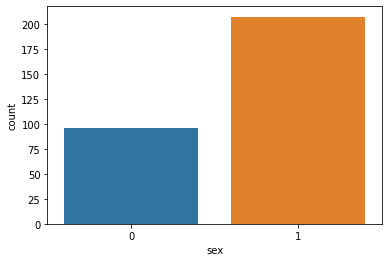

In [7]:
# Use seaborn library to plot the count of 'sex' column.
sns.countplot(data=data, x= 'sex')

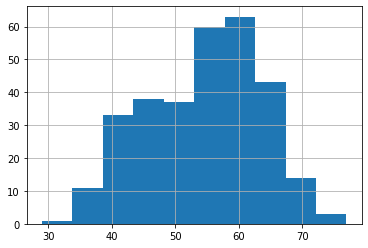

In [8]:
# Show the histogram of the 'age' column.
data['age'].hist()

In [9]:
# Devide the input data and target.
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [10]:
# Input Data.
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
# Target.
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
# Prepare train and test datasets.
# In order to do that, we can use a specific package in Sci-Kit library.
from sklearn.model_selection import train_test_split

In [13]:
# Specify the train and test inputs and targets.
# Note that we specify the randon state.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [14]:
# Use KNN algorithm for classification.
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Create a new KNN classifier with 5 neighbors.
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [16]:
# Learn from the data.
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
# Now let's evaluate our model with specific metrics.
# So we import specific metrics form Sci-Kit library.
from sklearn import metrics

In [18]:
# Save the prediction of our model.
y_predicted = knn_classifier.predict(X_test)

In [19]:
# Present the classification report.
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        32
           1       0.69      0.70      0.70        44

    accuracy                           0.64        76
   macro avg       0.63      0.63      0.63        76
weighted avg       0.64      0.64      0.64        76



In [20]:
# Present the confusion matrix.
print(metrics.confusion_matrix(y_test, y_predicted))

[[18 14]
 [13 31]]


In [21]:
# Create a new KNN classifier with 7 neighbors.
knn_classifier7 = KNeighborsClassifier(n_neighbors=7)

In [22]:
# Learn from the data.
knn_classifier7.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [23]:
# Save the prediction of our model.
y_predicted7 = knn_classifier7.predict(X_test)

In [24]:
# Present the classification report.
print(metrics.classification_report(y_test, y_predicted7))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58        32
           1       0.70      0.73      0.71        44

    accuracy                           0.66        76
   macro avg       0.65      0.64      0.65        76
weighted avg       0.66      0.66      0.66        76



In [25]:
# Present the confusion matrix.
print(metrics.confusion_matrix(y_test, y_predicted7))

[[18 14]
 [12 32]]


In [26]:
# Create a new KNN classifier with 3 neighbors.
knn_classifier3 = KNeighborsClassifier(n_neighbors=3)

In [27]:
# Learn from the data.
knn_classifier3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
# Save the prediction of our model.
y_predicted3 = knn_classifier3.predict(X_test)

In [29]:
# Present the classification report.
print(metrics.classification_report(y_test, y_predicted3))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        32
           1       0.73      0.73      0.73        44

    accuracy                           0.68        76
   macro avg       0.68      0.68      0.68        76
weighted avg       0.68      0.68      0.68        76



In [30]:
# Present the confusion matrix.
print(metrics.confusion_matrix(y_test, y_predicted3))

[[20 12]
 [12 32]]


In [31]:
# Now Use SVM algorithm for classification.
from sklearn.svm import SVC

In [32]:
# Create a new and specific SVM classifier.
svm_classifier = SVC(C=15, kernel='linear', random_state=25)

In [33]:
# Learn from the data.
svm_classifier.fit(X_train, y_train)

SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=25, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
# Save the prediction of our model.
y_predicted_svm = svm_classifier.predict(X_test)

In [35]:
# Present the classification report.
print(metrics.classification_report(y_test, y_predicted_svm))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.81      0.89      0.85        44

    accuracy                           0.82        76
   macro avg       0.82      0.80      0.81        76
weighted avg       0.82      0.82      0.81        76



In [36]:
# Present the confusion matrix.
# It seems that, in this case, SVM algorithm is better than KNN algorithm.
print(metrics.confusion_matrix(y_test, y_predicted_svm))

[[23  9]
 [ 5 39]]


In [37]:
# Introduce randomized search.
# Use randomized search from Sci-Kit Library.
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# Specify the parameters for randomized search.
parameters = {
    'C': [0, 1, 10],
    'kernel': ['linear'],
    'gamma': ['auto', 0.1]
}

In [39]:
# Create a new randomized search.
randomized_search = RandomizedSearchCV(SVC(), param_distributions=parameters, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

In [40]:
# Learn from the data.
# Start to randomized search for all data.
randomized_search.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   11.8s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0, 1, 10], 'gamma': ['auto', 0.1],
                                        'kernel': ['linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=10)

In [41]:
# Determine the best estimator.
randomized_search.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
# Determine the best score.
randomized_search.best_score_

0.8282720460090623

In [43]:
# Determine the best parameters.
# The result is same with grid search.
randomized_search.best_params_

{'kernel': 'linear', 'gamma': 'auto', 'C': 1}